In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dogs = pd.read_csv('../datasets/dogs.csv')

In [3]:
dogs

,breed,height,weight
0,Border Collie,20,45
1,Boston Terrier,16,20
2,Brittany Spaniel,18,35
3,Bullmastiff,27,120
4,Chihuahua,8,8
5,German Shepherd,25,78
6,Golden Retriever,23,70
7,Great Dane,32,160
8,Portuguese Water Dog,21,50
9,Standard Poodle,19,65


In [4]:
dogs.isna().any()

breed     False
height    False
weight    False
dtype: bool

In [5]:
feature_names = dogs.columns[1:]

In [6]:
feature_names

Index(['height', 'weight'], dtype='object')

In [7]:
X = dogs[feature_names]

In [8]:
X

,height,weight
0,20,45
1,16,20
2,18,35
3,27,120
4,8,8
5,25,78
6,23,70
7,32,160
8,21,50
9,19,65


In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()

In [11]:
scaler.fit(X)

MinMaxScaler()

In [12]:
X = pd.DataFrame(scaler.transform(X), columns=feature_names)

In [13]:
X

,height,weight
0,0.538462,0.248366
1,0.384615,0.084967
2,0.461538,0.183007
3,0.807692,0.738562
4,0.076923,0.006536
5,0.730769,0.464052
6,0.653846,0.411765
7,1.000000,1.000000
8,0.576923,0.281046
9,0.500000,0.379085


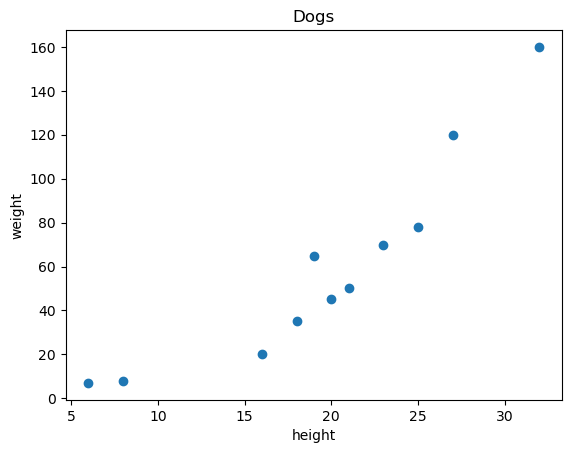

In [15]:
plt.scatter(dogs['height'], dogs['weight'])
plt.xlabel('height')
plt.ylabel('weight')
plt.title('Dogs')
plt.show()

In [14]:
from sklearn.cluster import KMeans

In [16]:
kmeans = KMeans(n_clusters=2, n_init='auto')

In [17]:
kmeans.fit(X)

KMeans(n_clusters=2)

In [18]:
np.unique(kmeans.labels_)

array([0, 1], dtype=int32)

In [19]:
X[kmeans.labels_ == 0]

,height,weight
0,0.538462,0.248366
1,0.384615,0.084967
2,0.461538,0.183007
4,0.076923,0.006536
6,0.653846,0.411765
8,0.576923,0.281046
9,0.500000,0.379085
10,0.000000,0.000000


In [21]:
X[kmeans.labels_ == 1]

,height,weight
3,0.807692,0.738562
5,0.730769,0.464052
7,1.000000,1.000000


In [24]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=feature_names)

In [25]:
centers

,height,weight
0,0.399038,0.199346
1,0.846154,0.734205


In [26]:
# SSE
kmeans.inertia_

0.7521858243002849

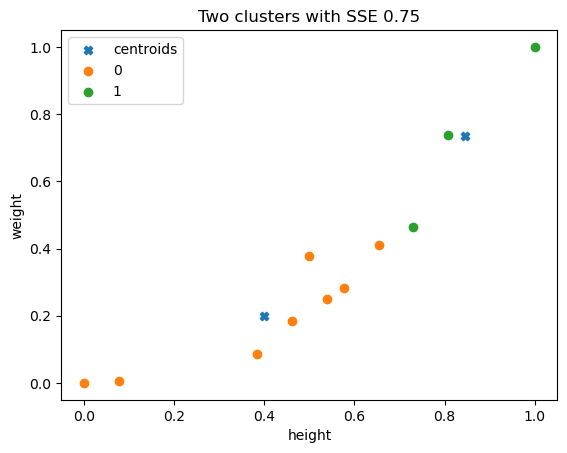

In [27]:
plt.scatter(centers['height'], centers['weight'], marker='X', label='centroids')

for c in np.unique(kmeans.labels_):
    elems = X[kmeans.labels_ == c]
    plt.scatter(elems['height'], elems['weight'], label=c)
    
plt.xlabel('height')
plt.ylabel('weight')
plt.title(f'Two clusters with SSE {round(kmeans.inertia_, 2)}')
plt.legend()
plt.show()

In [28]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [29]:
silhouette_values = silhouette_samples(X, kmeans.labels_)

In [30]:
silhouette_values

array([ 0.54767317,  0.62873113,  0.61952489,  0.55403802,  0.5728247 ,
       -0.0300102 , -0.02088641,  0.54056674,  0.46892879,  0.3993563 ,
        0.5424539 ])

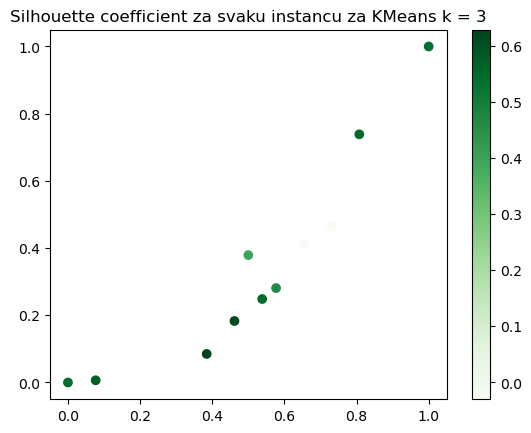

In [31]:
plt.scatter(X['height'], X['weight'], c=silhouette_values, cmap='Greens')
plt.colorbar()
plt.title('Silhouette coefficient za svaku instancu za KMeans k = 3')
plt.show()

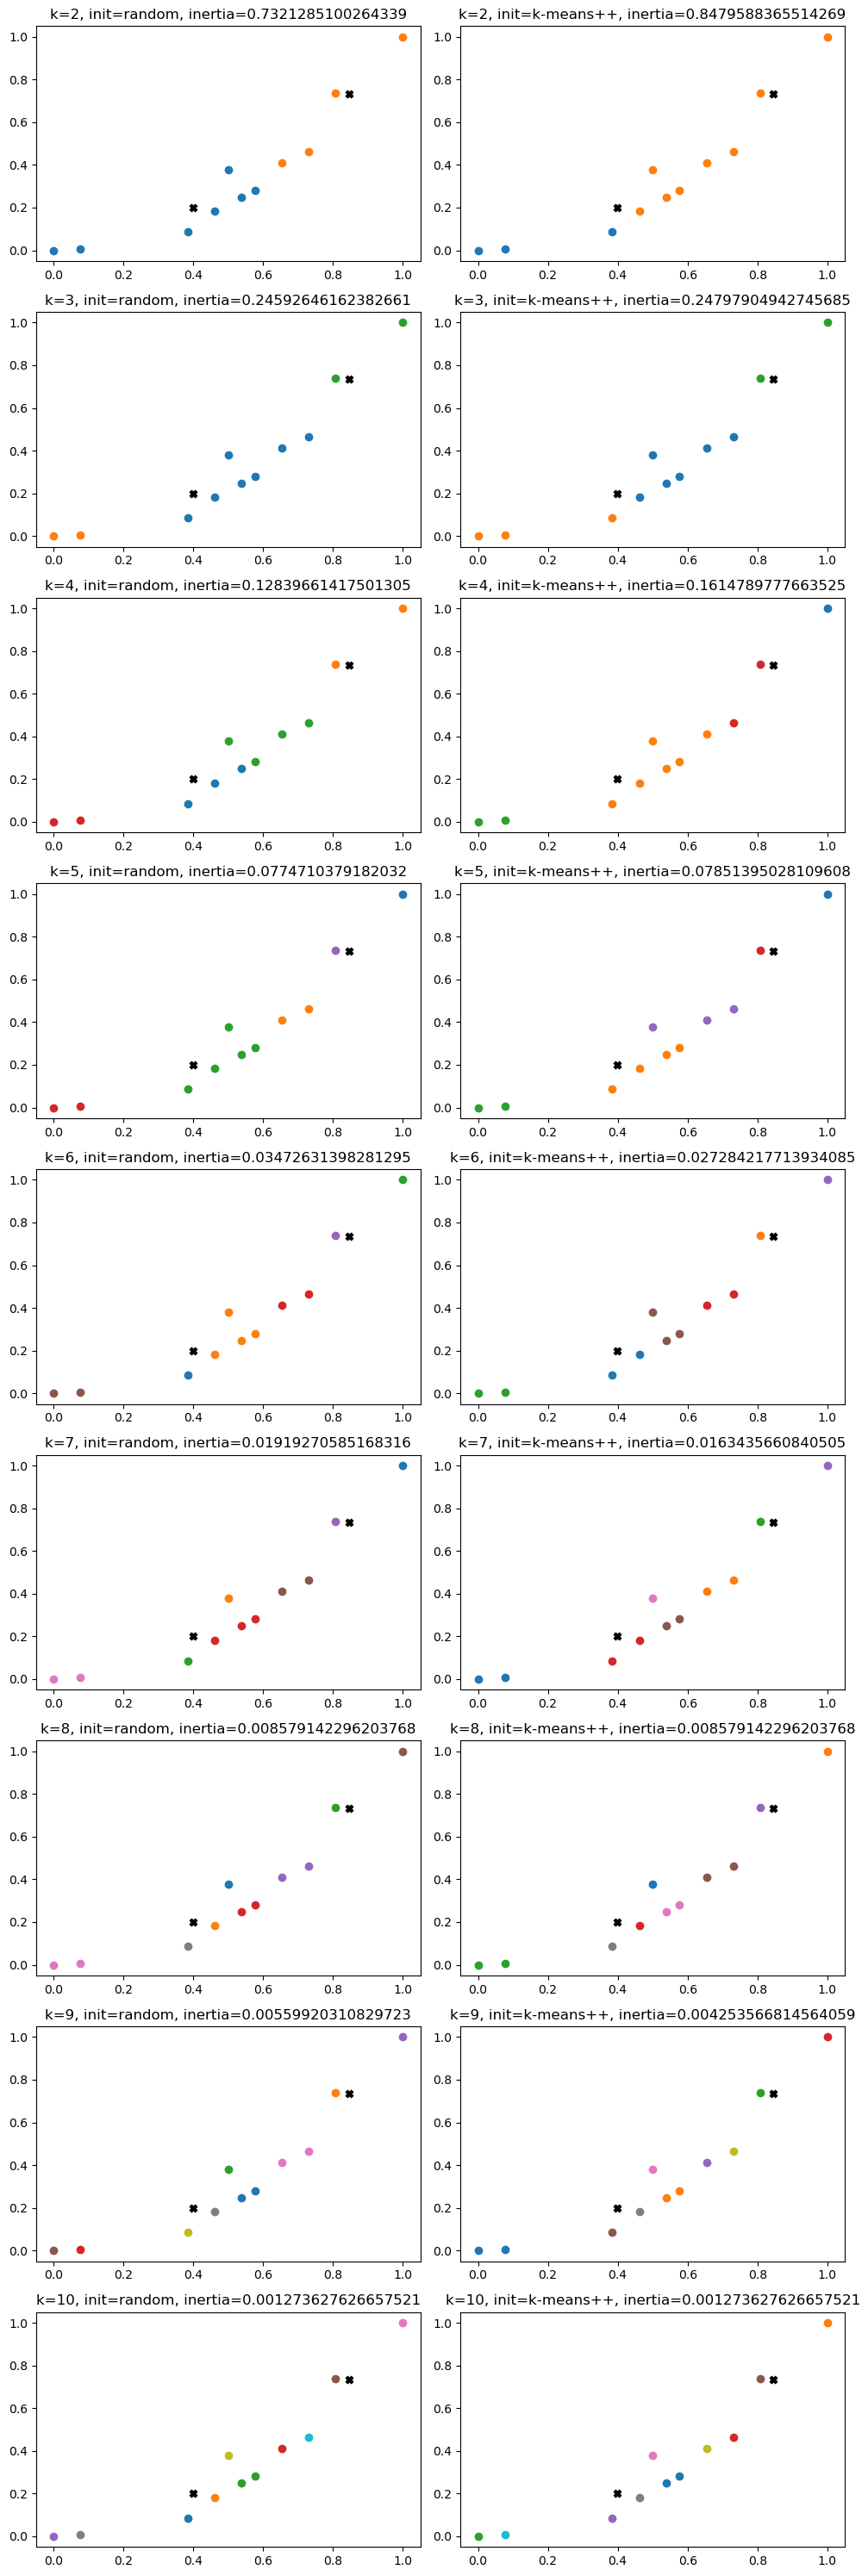

In [33]:
ks = range(2, X.shape[0])
inits = ['random', 'k-means++']
fig = plt.figure(figsize=(10,30))
idx = 1
silhouette = []
inertias = []

for k in ks:
    for init in inits:
        kmeans = KMeans(n_clusters=k, init=init, n_init='auto')
        kmeans.fit(X)
        
        if init == 'k-means++':
            inertias.append(kmeans.inertia_)
            silhouette.append(silhouette_score(X, kmeans.labels_))
        
        fig.add_subplot(len(ks), len(inits), idx)
        idx += 1
        
        for label in np.unique(kmeans.labels_):
            elems = X[kmeans.labels_ == label]
            plt.scatter(elems['height'], elems['weight'])
            
        centroids = pd.DataFrame(kmeans.cluster_centers_, columns=feature_names)
        plt.scatter(centers['height'], centers['weight'], color='black', marker='X')
        
        plt.title(f'k={k}, init={init}, inertia={kmeans.inertia_}')
        
plt.tight_layout()

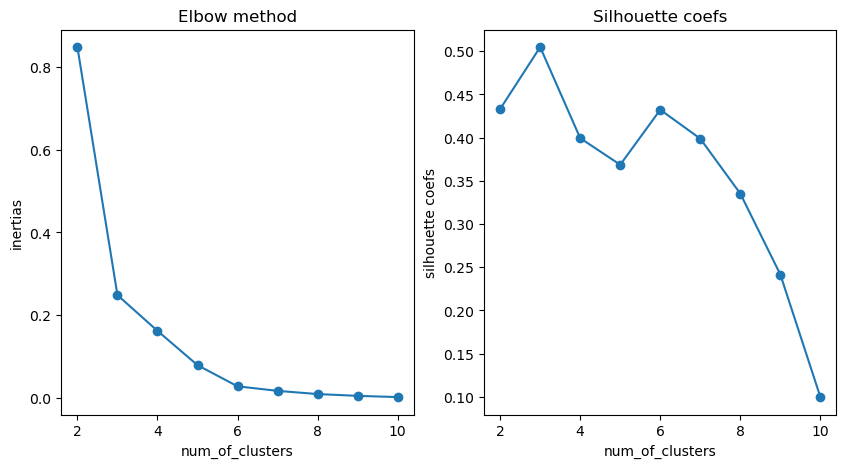

In [34]:
fig = plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(ks, inertias, marker='o')
plt.ylabel('inertias')
plt.xlabel('num_of_clusters')
plt.title('Elbow method')

plt.subplot(1, 2, 2)
plt.plot(ks, silhouette, marker='o')
plt.ylabel('silhouette coefs')
plt.xlabel('num_of_clusters')
plt.title('Silhouette coefs')

plt.show()

In [35]:
# kompresija slike:

from matplotlib.image import imread
import seaborn as sns

In [36]:
img = imread('../datasets/masa.jpg')

In [37]:
img_size = img.shape

In [38]:
img_size

(396, 396, 3)

In [39]:
X_img = img.reshape(img_size[0] * img_size[1], img_size[2])

In [40]:
X_img

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

In [41]:
km = KMeans(n_clusters=30, n_init='auto')

In [42]:
km.fit(X_img)

KMeans(n_clusters=30)

In [43]:
X_compressed = km.cluster_centers_[km.labels_]

In [44]:
X_compressed = np.clip(X_compressed.astype('uint'), 0, 255)

In [45]:
X_compressed = X_compressed.reshape(img_size[0], img_size[1], img_size[2])

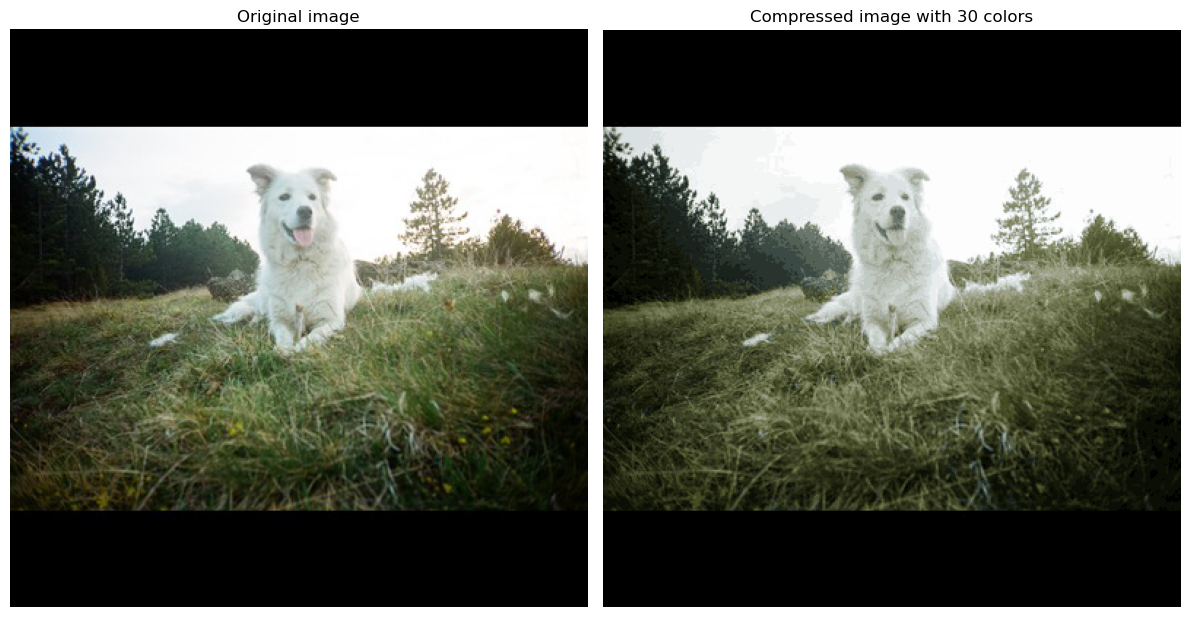

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(12,8))
ax[0].imshow(img)
ax[0].set_title('Original image')

ax[1].imshow(X_compressed)
ax[1].set_title('Compressed image with 30 colors')

for ax in fig.axes:
    ax.axis('off')

plt.tight_layout()

In [47]:
from sklearn.cluster import BisectingKMeans

In [48]:
bkmeans = BisectingKMeans(n_clusters=3, bisecting_strategy='largest_cluster')

In [56]:
def visualize_clustering(data, centers, labels, feature_names, alg_name):
    plt.scatter(centers[:,0], centers[:,1], marker='X', label='centroids', color='black')
    
    for c in np.unique(labels):
        elems = data[labels == c]
        plt.scatter(elems[feature_names[0]], elems[feature_names[1]], label=c)
        
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(f'{alg_name} {len(centers)} clusters')
    plt.legend()
    plt.show()

In [50]:
bkmeans.fit(X)

BisectingKMeans(bisecting_strategy='largest_cluster', n_clusters=3)

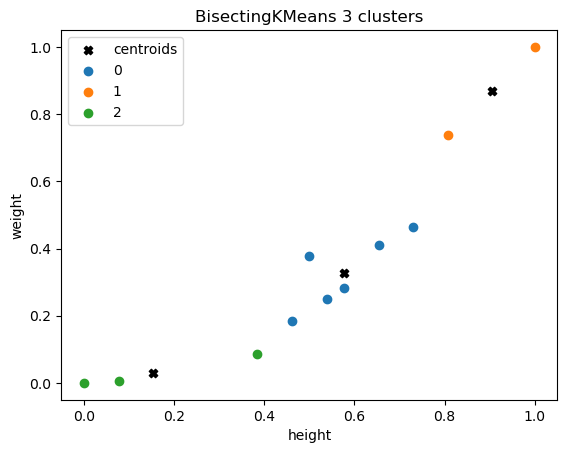

In [57]:
visualize_clustering(X, bkmeans.cluster_centers_, bkmeans.labels_, feature_names, "BisectingKMeans")

In [58]:
from fcmeans import FCM 

In [59]:
fcm = FCM(n_clusters=3, m=3)

In [60]:
fcm.fit(X.to_numpy())

In [61]:
labels = fcm.predict(X.to_numpy())

In [62]:
centers = fcm.centers

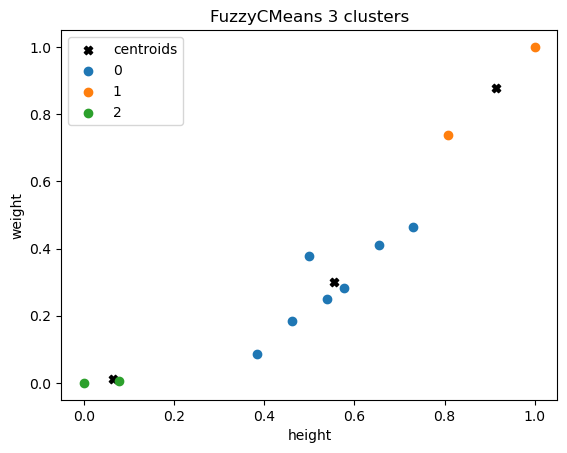

In [63]:
visualize_clustering(X, fcm.centers, fcm.predict(X.to_numpy()), X.columns, "FuzzyCMeans")

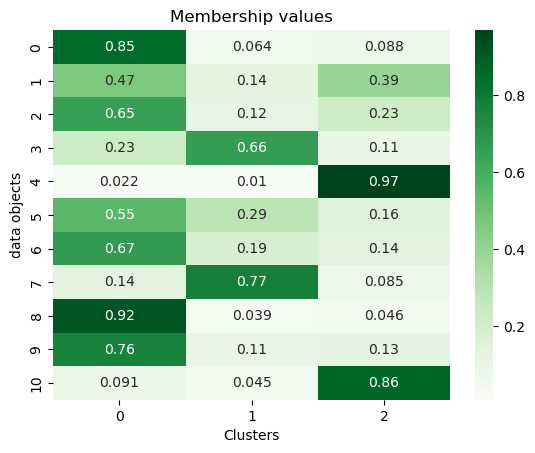

In [64]:
sns.heatmap(fcm.soft_predict(X.to_numpy()), cmap='Greens', annot=True)
plt.title('Membership values')
plt.xlabel('Clusters')
plt.ylabel('data objects')
plt.show()